In [18]:
from LoopStructural import GeologicalModel
from LoopStructural.modelling.fault.fault_function import BaseFault
from LoopStructural.visualisation import LavaVuModelViewer
from LoopStructural.utils.helper import strike_dip_vector
# import other libraries
import pandas as pd
import numpy as np
import logging
logging.getLogger().setLevel(logging.INFO)

In [19]:
output_path='../test_data3/output/'
location_data = pd.read_csv(output_path+'faults.csv')
location_data['val'] = 0
orientation_data = pd.read_csv(output_path+'fault_orientations.csv')


In [21]:
df = pd.read_csv(output_path+'formation_thicknesses.csv')
thickness = {}
for f in df['formation'].unique():
    thickness[f] = np.mean(df[df['formation']==f]['thickness'])
display(thickness)

{'A_FOp_bs': 933.94,
 'A_FOo_bbo': 645.3061224489796,
 'A_FOh_xs_f': 1326.7469135802469,
 'A_HAd_kd': 413.6308851224105,
 'A_HAS_xsl_ci': 234.0494923857868,
 'A_HAm_cib': 313.3327256153145,
 'A_FOj_xs_b': 718.8226037195994,
 'P__HAo_ci': 445.2383177570093,
 'P__HAw_fr': 415.43793103448274,
 'P__HAj_xci_od': 559.843537414966,
 'P__HAb_cib': 926.4295081967213,
 'P__TK_s': 1360.6,
 'P__WYa_st': 495.6363636363636,
 'P__TKo_stq': 326.0,
 'P__TKa_xs_k': 2415.75,
 'A_FOr_b': 199.46808510638297,
 'P__TKk_sf': 2144.0,
 'P__SKb_bb': 2563.0}

In [22]:
order = ['A_HAu_xsl_ci',
'A_HAd_kd',
'A_HAm_cib',
'A_FOj_xs_b',
'A_FO_xo_a',
'A_FO_od',
'A_FOu_bbo',
'A_FOp_bs',
'A_FOo_bbo',
'A_FOh_xs_f',
'A_FOr_b',
'A_s_PMI',
'A_mgn_PRK']

In [23]:
strat_val = {}
val = 0
for o in order:
    if o in thickness:
        strat_val[o] = val
        val+=thickness[o]

In [26]:
orientations = pd.read_csv(output_path+'orientations.csv')
contacts = pd.read_csv(output_path+'contacts4.csv')
contacts['val'] = np.nan 

for o in strat_val:
    contacts.loc[contacts['formation']==o,'val'] = strat_val[o]
sdata = pd.concat([orientations,contacts],sort=False)
display(sdata)

,X,Y,Z,azimuth,dip,polarity,formation,val
0,530083.185332,7.485330e+06,413.000000,8.0,55.0,1.0,A_FOh_xs_f,NaN
1,532466.058612,7.483852e+06,422.000000,10.0,40.0,1.0,A_FOh_xs_f,NaN
2,504669.323074,7.461017e+06,339.000000,181.0,70.0,1.0,P__WYm_sp,NaN
3,503404.331934,7.460230e+06,301.000000,182.0,45.0,1.0,P__WYd_kd,NaN
4,517319.479838,7.458552e+06,349.000000,199.0,10.0,1.0,P__SKq_stq,NaN
5,516865.384903,7.458957e+06,336.000000,227.0,45.0,1.0,P__TK_s,NaN
6,515438.181521,7.463725e+06,341.000000,359.0,44.0,1.0,P__HAj_xci_od,NaN
7,507945.284967,7.467496e+06,328.000000,203.0,58.0,1.0,P__TKk_sf,NaN
8,503517.659190,7.466604e+06,362.000000,0.0,60.0,1.0,P__TKk_sf,NaN
9,503809.705274,7.463490e+06,324.000000,3.0,68.0,1.0,P__SKq_stq,NaN


In [25]:
displacements = pd.read_csv(output_path+'fault_displacements3.csv')
display(displacements)

,X,Y,fname,apparent_displacement,vertical_displacement
0,523268.120747,7.485626e+06,Fault_2235,507,293
1,522285.260041,7.487566e+06,Fault_2235,632,394
2,521224.289960,7.489118e+06,Fault_2235,0,0
3,516855.688427,7.495863e+06,Fault_2235,1885,954
4,515387.880201,7.497450e+06,Fault_2235,549,227
5,515090.681179,7.497755e+06,Fault_2235,702,275
6,514472.009060,7.498278e+06,Fault_2235,438,167
7,532580.791701,7.486055e+06,Fault_3496,0,0
8,531873.554617,7.487027e+06,Fault_3496,0,0
9,530193.100235,7.489541e+06,Fault_3496,-3227,1902


In [24]:
data = pd.concat([location_data,orientation_data,sdata],sort=True)
data['strike'] = data['azimuth']-90
data['nx'] = np.nan
data['ny'] = np.nan
data['nz'] = np.nan
data[['nx','ny','nz']] = strike_dip_vector(data['strike'],data['dip'])
data = data.reset_index(drop=True)
display(data)

,DipDirection,DipPolarity,X,Y,Z,azimuth,dip,formation,polarity,val,strike,nx,ny,nz
0,NaN,NaN,570368.812387,7.496846e+06,647.000000,NaN,NaN,Fault_12644,NaN,0.000000,NaN,NaN,NaN,NaN
1,NaN,NaN,574282.960749,7.494846e+06,672.000000,NaN,NaN,Fault_12644,NaN,0.000000,NaN,NaN,NaN,NaN
2,NaN,NaN,579396.993793,7.492418e+06,733.000000,NaN,NaN,Fault_12644,NaN,0.000000,NaN,NaN,NaN,NaN
3,NaN,NaN,579998.531610,7.491862e+06,720.000000,NaN,NaN,Fault_12644,NaN,0.000000,NaN,NaN,NaN,NaN
4,NaN,NaN,583470.178589,7.487731e+06,804.000000,NaN,NaN,Fault_12644,NaN,0.000000,NaN,NaN,NaN,NaN
5,NaN,NaN,586001.218327,7.485082e+06,774.000000,NaN,NaN,Fault_12644,NaN,0.000000,NaN,NaN,NaN,NaN
6,NaN,NaN,589004.049190,7.484832e+06,692.000000,NaN,NaN,Fault_12644,NaN,0.000000,NaN,NaN,NaN,NaN
7,NaN,NaN,525375.306361,7.483425e+06,422.000000,NaN,NaN,Fault_2235,NaN,0.000000,NaN,NaN,NaN,NaN
8,NaN,NaN,522902.449866,7.486302e+06,451.000000,NaN,NaN,Fault_2235,NaN,0.000000,NaN,NaN,NaN,NaN
9,NaN,NaN,521224.289960,7.489118e+06,511.000000,NaN,NaN,Fault_2235,NaN,0.000000,NaN,NaN,NaN,NaN


In [9]:
displacements[np.logical_and(np.abs(displacements['vertical_displacement'])>500,np.abs(displacements['vertical_displacement'])>1000)]

,X,Y,fname,apparent_displacement,vertical_displacement
9,530193.100235,7.489541e+06,Fault_3496,-3227,1902
14,527680.867203,7.490013e+06,Fault_12647,1974,1775
61,514456.268843,7.510127e+06,Fault_12660,1820,1043
67,521012.040045,7.512605e+06,Fault_16769,-1411,1017
92,539162.759905,7.463113e+06,Fault_7344,-32595,18685
93,531591.341034,7.465353e+06,Fault_7344,3819,1078
94,511878.167628,7.478935e+06,Fault_7344,32433,6231
100,506417.257805,7.491318e+06,Fault_7344,-3586,1151
109,581824.430395,7.486696e+06,Fault_6825,-5335,1101
114,580338.020429,7.480681e+06,Fault_2996,7468,2138


In [10]:
fault_names = displacements[np.abs(displacements['vertical_displacement'])>500].fname.unique()

In [11]:
data

,DipDirection,DipPolarity,X,Y,Z,azimuth,dip,formation,polarity,val,strike,nx,ny,nz
0,NaN,NaN,570368.812387,7.496846e+06,647.000000,NaN,NaN,Fault_12644,NaN,0.000000,NaN,NaN,NaN,NaN
1,NaN,NaN,574282.960749,7.494846e+06,672.000000,NaN,NaN,Fault_12644,NaN,0.000000,NaN,NaN,NaN,NaN
2,NaN,NaN,579396.993793,7.492418e+06,733.000000,NaN,NaN,Fault_12644,NaN,0.000000,NaN,NaN,NaN,NaN
3,NaN,NaN,579998.531610,7.491862e+06,720.000000,NaN,NaN,Fault_12644,NaN,0.000000,NaN,NaN,NaN,NaN
4,NaN,NaN,583470.178589,7.487731e+06,804.000000,NaN,NaN,Fault_12644,NaN,0.000000,NaN,NaN,NaN,NaN
5,NaN,NaN,586001.218327,7.485082e+06,774.000000,NaN,NaN,Fault_12644,NaN,0.000000,NaN,NaN,NaN,NaN
6,NaN,NaN,589004.049190,7.484832e+06,692.000000,NaN,NaN,Fault_12644,NaN,0.000000,NaN,NaN,NaN,NaN
7,NaN,NaN,525375.306361,7.483425e+06,422.000000,NaN,NaN,Fault_2235,NaN,0.000000,NaN,NaN,NaN,NaN
8,NaN,NaN,522902.449866,7.486302e+06,451.000000,NaN,NaN,Fault_2235,NaN,0.000000,NaN,NaN,NaN,NaN
9,NaN,NaN,521224.289960,7.489118e+06,511.000000,NaN,NaN,Fault_2235,NaN,0.000000,NaN,NaN,NaN,NaN


In [12]:
data = data.rename(columns={'formation':'type','azimuth':'old_azi','strke':'Strike'})
# data['type'] = np.nan
for o in order:
    data.loc[data['type']==o,'type'] = 's0'
data 
data

,DipDirection,DipPolarity,X,Y,Z,old_azi,dip,type,polarity,val,strike,nx,ny,nz
0,NaN,NaN,570368.812387,7.496846e+06,647.000000,NaN,NaN,Fault_12644,NaN,0.000000,NaN,NaN,NaN,NaN
1,NaN,NaN,574282.960749,7.494846e+06,672.000000,NaN,NaN,Fault_12644,NaN,0.000000,NaN,NaN,NaN,NaN
2,NaN,NaN,579396.993793,7.492418e+06,733.000000,NaN,NaN,Fault_12644,NaN,0.000000,NaN,NaN,NaN,NaN
3,NaN,NaN,579998.531610,7.491862e+06,720.000000,NaN,NaN,Fault_12644,NaN,0.000000,NaN,NaN,NaN,NaN
4,NaN,NaN,583470.178589,7.487731e+06,804.000000,NaN,NaN,Fault_12644,NaN,0.000000,NaN,NaN,NaN,NaN
5,NaN,NaN,586001.218327,7.485082e+06,774.000000,NaN,NaN,Fault_12644,NaN,0.000000,NaN,NaN,NaN,NaN
6,NaN,NaN,589004.049190,7.484832e+06,692.000000,NaN,NaN,Fault_12644,NaN,0.000000,NaN,NaN,NaN,NaN
7,NaN,NaN,525375.306361,7.483425e+06,422.000000,NaN,NaN,Fault_2235,NaN,0.000000,NaN,NaN,NaN,NaN
8,NaN,NaN,522902.449866,7.486302e+06,451.000000,NaN,NaN,Fault_2235,NaN,0.000000,NaN,NaN,NaN,NaN
9,NaN,NaN,521224.289960,7.489118e+06,511.000000,NaN,NaN,Fault_2235,NaN,0.000000,NaN,NaN,NaN,NaN


In [13]:
boundary_points = np.zeros((2,3))
boundary_points[0,0] = 500000.0000000026#origin[0]#-1000#-10 #np.min(coords[:,0])-10
boundary_points[0,1] = 7454093.693147668#origin[1]#-1000#-10 #np.min(coords[:,1])
boundary_points[0,2] = -20000#origin[2]#-4500#-5000#0#-40#minz
boundary_points[1,0] = 605065.8521#maximum[0]#10000#10000 #np.max(coords[:,0])
boundary_points[1,1] = 7567173.042479938#maximum[1]#10000#12000 #np.max(coords[:,1])
boundary_points[1,2] = 1500#maximum[2]#500#500#-50000#-minz*0.1

In [14]:
faults = []
model = GeologicalModel(boundary_points[0,:],boundary_points[1,:])
model.set_model_data(data)

In [15]:
model.data['type']

0       Fault_12644
1       Fault_12644
2       Fault_12644
3       Fault_12644
4       Fault_12644
5       Fault_12644
6       Fault_12644
7        Fault_2235
8        Fault_2235
9        Fault_2235
10       Fault_2235
11       Fault_2235
12       Fault_2235
13       Fault_2235
14       Fault_2235
15       Fault_2235
16      Fault_11442
17      Fault_11442
18      Fault_11442
19      Fault_11442
20      Fault_11442
21      Fault_11442
22      Fault_11442
23      Fault_11442
24      Fault_11442
25       Fault_3496
26       Fault_3496
27       Fault_3496
28       Fault_3496
29       Fault_3496
           ...     
3321             s0
3322             s0
3323             s0
3324             s0
3325             s0
3326             s0
3327             s0
3328             s0
3329             s0
3330             s0
3331             s0
3332             s0
3333             s0
3334             s0
3335             s0
3336             s0
3337             s0
3338      P__WYd_kd
3339      P__WYd_kd


In [16]:
for f in fault_names:
    fault_data =  model.data[np.logical_and(model.data['type'] == f,~np.isnan(model.data['val']))].reset_index(drop=True)
    if fault_data.shape[0] > 0:
        fault_length = fault_data.loc[0,['X','Y','Z']].to_numpy()-fault_data.loc[len(fault_data)-1,['X','Y','Z']].to_numpy()
        fault_length = np.linalg.norm(fault_length)
        fault_length*=0.15
        model.data.loc[model.data['type']==f,['nx','ny','nz']] /= fault_length
        #print(fault_length)

In [17]:

for f in fault_names:
    if model.data[model.data['type'] == f].shape[0] == 0:
        continue
    faults.append(model.create_and_add_fault(f,
                                             np.max(np.abs(displacements[displacements['fname']==f]['vertical_displacement'].to_numpy()))*2,
                                             faultfunction=BaseFault.fault_displacement,
                                                 interpolatortype='PLI',
                                                 nelements=1e5,
                                                 data_region=.5,
#                                                  cgw=0.05,
                                                 regularisation=[.3,1,1],
                                                 solver='cg',
                                                 damp=True,
                                                 buffer=0.1,
                                                 steps=1,
#                                              gpw=100
                                                )
                 )
    

C:\Users\00073294\AppData\Roaming\Python\Python37\site-packages\loopstructural-0.0.0-py3.7-win-amd64.egg\LoopStructural\modelling\core\geological_model.py:601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  fault_frame_data['coord'] = 0


ValueError: operands could not be broadcast together with shapes (0,3) (0,) (0,3) 

INFO:LoopStructural.visualisation.model_visualisation:Adding x section at 0.000000
INFO:LoopStructural.visualisation.model_visualisation:Adding y section at 0.000000
INFO:LoopStructural.visualisation.model_visualisation:Creating isosurface of Fault_2235_0 at -1.000000
INFO:LoopStructural.visualisation.model_visualisation:Creating isosurface of Fault_3496_0 at -1.000000
INFO:LoopStructural.visualisation.model_visualisation:Creating isosurface of Fault_12647_0 at -1.000000
INFO:LoopStructural.visualisation.model_visualisation:Creating isosurface of Fault_2843_0 at -1.000000
INFO:LoopStructural.visualisation.model_visualisation:Creating isosurface of Fault_6000_0 at -1.000000
INFO:LoopStructural.visualisation.model_visualisation:Creating isosurface of Fault_6000_0 at 0.000000
INFO:LoopStructural.visualisation.model_visualisation:Creating isosurface of Fault_14378_0 at -1.000000
INFO:LoopStructural.visualisation.model_visualisation:Creating isosurface of Fault_12660_0 at -1.000000
INFO:Loo


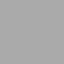

In [18]:
viewer = LavaVuModelViewer(model)
viewer.nsteps = np.array([100,100,100])
viewer.add_section(None,value=0,colour='white')
viewer.add_section(None,axis='y',value=0,colour='white')

for f in faults:
    try:
#     print(f['feature'].name)
#     print(f['feature'])
        viewer.add_isosurface(f['feature'][0],
                              slices=[-1,0,1],
                            paint_with=f['feature'].displacementfeature

#                               isovalue=0
                             )
        viewer.add_isosurface(f['feature'][1],
                              slices=[-1,0,1],
                            paint_with=f['feature'].displacementfeature

#                               isovalue=0
                             )
        viewer.add_isosurface(f['feature'][2],
                              slices=[-1,0,1],
                              paint_with=f['feature'].displacementfeature
#                               isovalue=0
                             )
        viewer.add_data(f['feature'][0],cmap='rainbow')
#     viewer.add_scalar_field(f['feature'].displacementfeature,
#                           slices=[-0.01,0.01]#isovalue=0
#                          )
    except:
        continue
# viewer.add_isosurface(strati['feature'],
# #                       nslices=10,
#                   slices= strat_val.values(),
# #                     voxet={'bounding_box':boundary_points,'nsteps':(100,100,50)},
#                   paint_with=strati['feature'],
#                   cmap='tab20'

#                  )
# viewer.add_section(strati['feature'],'z',0)
# viewer.add_scalar_field(strati['feature'],
# #                       nslices=10,
#                   slices= strat_val.values(),
# #                     voxet={'bounding_box':boundary_points,'nsteps':(100,100,50)},
#                   paint_with=strati['feature'],
#                   cmap='tab20'

#                  )
#         viewer.add_isosurface(f['feature'][1],
#                               nslices=5
#                          )
#         viewer.add_isosurface(f['feature'][2],
#                               nslices=5
#                          )
#         # viewer.add_scalar_field(faults[0]['feature'])
#         viewer.add_data(f['feature'][0])
#         viewer.add_data(f['feature'][1])
#         viewer.add_data(f['feature'][2])

    
viewer.interactive()

In [19]:
strati = model.create_and_add_foliation('s0', #identifier in data frame
                                                    interpolatortype="FDI", #which interpolator to use
                                                    nelements=1e4, # how many tetras/voxels
                                                    buffer=0.2, # how much to extend nterpolation around box
                                                    solver='pyamg',
                                                    damp=True
                                                   )


INFO:LoopStructural.modelling.features.geological_feature_builder:Adding 15 faults to s0
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-0.0.0-py3.8-linux-x86_64.egg/LoopStructural/modelling/fault/fault_segment.py:176: RuntimeWarning: invalid value encountered in greater
  d[gx > 0] = 1.
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-0.0.0-py3.8-linux-x86_64.egg/LoopStructural/modelling/fault/fault_segment.py:177: RuntimeWarning: invalid value encountered in less
  d[gx < 0] = 0.
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-0.0.0-py3.8-linux-x86_64.egg/LoopStructural/modelling/fault/fault_function.py:62: RuntimeWarning: invalid value encountered in greater
  r[v > 0] = self.positive(v[v > 0])
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-0.0.0-py3.8-linux-x86_64.egg/LoopStructural/modelling/fault/fault_function.py:63: RuntimeWarning: invalid value encountered in les

INFO:LoopStructural.visualisation.model_visualisation:Adding x section at 0.000000
INFO:LoopStructural.visualisation.model_visualisation:Adding y section at 0.000000
INFO:LoopStructural.visualisation.model_visualisation:Creating isosurface of Fault_2235_0 at 0.000000
INFO:LoopStructural.visualisation.model_visualisation:Creating isosurface of Fault_3496_0 at 0.000000
INFO:LoopStructural.visualisation.model_visualisation:Creating isosurface of Fault_12647_0 at 0.000000
INFO:LoopStructural.visualisation.model_visualisation:Creating isosurface of Fault_2843_0 at 0.000000
INFO:LoopStructural.visualisation.model_visualisation:Creating isosurface of Fault_6000_0 at 0.000000
INFO:LoopStructural.visualisation.model_visualisation:Creating isosurface of Fault_14378_0 at 0.000000
INFO:LoopStructural.visualisation.model_visualisation:Creating isosurface of Fault_12660_0 at 0.000000
INFO:LoopStructural.visualisation.model_visualisation:Creating isosurface of Fault_15552_0 at 0.000000
INFO:LoopStruc


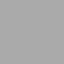

In [20]:
viewer = LavaVuModelViewer(model)
viewer.nsteps = np.array([100,100,50])
viewer.add_section(None,value=0,colour='white')
viewer.add_section(None,axis='y',value=0,colour='white')
for f in faults:
    try:
#     print(f['feature'].name)
#     print(f['feature'])
        viewer.add_isosurface(f['feature'][0],
    #                           slices=[-1,0,1]
                              isovalue=0
                             )
#     viewer.add_scalar_field(f['feature'].displacementfeature,
#                           slices=[-0.01,0.01]#isovalue=0
#                          )
    except:
        continue
# viewer.add_isosurface(strati['feature'],
# #                       nslices=10,
#                   slices= strat_val.values(),
# #                     voxet={'bounding_box':boundary_points,'nsteps':(100,100,50)},
#                   paint_with=strati['feature'],
#                   cmap='tab20'

#                  )
viewer.add_section(strati['feature'],'z',.10,cmap='tab20')
# viewer.add_scalar_field(strati['feature'],
# #                       nslices=10,
#                   slices= strat_val.values(),
# #                     voxet={'bounding_box':boundary_points,'nsteps':(100,100,50)},
#                   paint_with=strati['feature'],
#                   cmap='tab20'

#                  )
#         viewer.add_isosurface(f['feature'][1],
#                               nslices=5
#                          )
#         viewer.add_isosurface(f['feature'][2],
#                               nslices=5
#                          )
#         # viewer.add_scalar_field(faults[0]['feature'])
#         viewer.add_data(f['feature'][0])
#         viewer.add_data(f['feature'][1])
#         viewer.add_data(f['feature'][2])

    
viewer.interactive()

INFO:LoopStructural.visualisation.model_visualisation:Adding x section at 0.000000
INFO:LoopStructural.visualisation.model_visualisation:Adding y section at 0.000000
INFO:LoopStructural.visualisation.model_visualisation:Creating isosurface of Fault_2235_0 at 0.000000
INFO:LoopStructural.visualisation.model_visualisation:Creating isosurface of Fault_3496_0 at 0.000000
INFO:LoopStructural.visualisation.model_visualisation:Creating isosurface of Fault_12647_0 at 0.000000
INFO:LoopStructural.visualisation.model_visualisation:Creating isosurface of Fault_2843_0 at 0.000000
INFO:LoopStructural.visualisation.model_visualisation:Creating isosurface of Fault_6000_0 at 0.000000
INFO:LoopStructural.visualisation.model_visualisation:Creating isosurface of Fault_14378_0 at 0.000000
INFO:LoopStructural.visualisation.model_visualisation:Creating isosurface of Fault_12660_0 at 0.000000
INFO:LoopStructural.visualisation.model_visualisation:Creating isosurface of Fault_15552_0 at 0.000000
INFO:LoopStruc


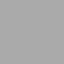

In [21]:
viewer = LavaVuModelViewer(model)
viewer.nsteps = np.array([250,250,250])
viewer.add_section(None,value=0,colour='white')
viewer.add_section(None,axis='y',value=0,colour='white')
for f in faults:
    try:
#     print(f['feature'].name)
#     print(f['feature'])
        viewer.add_isosurface(f['feature'][0],
    #                           slices=[-1,0,1]
                              isovalue=0
                             )
#     viewer.add_scalar_field(f['feature'].displacementfeature,
#                           slices=[-0.01,0.01]#isovalue=0
#                          )
    except:
        continue
viewer.add_isosurface(strati['feature'],
#                       nslices=10,
                  slices= strat_val.values(),
#                     voxet={'bounding_box':boundary_points,'nsteps':(100,100,50)},
                  paint_with=strati['feature'],
                  cmap='tab20'

                 )

#         viewer.add_isosurface(f['feature'][1],
#                               nslices=5
#                          )
#         viewer.add_isosurface(f['feature'][2],
#                               nslices=5
#                          )
#         # viewer.add_scalar_field(faults[0]['feature'])
#         viewer.add_data(f['feature'][0])
#         viewer.add_data(f['feature'][1])
#         viewer.add_data(f['feature'][2])

    
viewer.interactive()

In [22]:
for f in model.features:
    try:
        print(f.displacement)
    except:
        continue

0.016873107346891156
0.03364009452178929
0.03139388421460357
0.011620158833236362
0.0093385751353863
0.00917939487739676
0.018447223231454375
0.00917939487739676
0.01798736915281793
0.013565695319775174
0.01381330905442557
0.013937115921750766
0.037814154620181645
0.01176165239589373
0.021188661007940885


In [23]:
i = 0
plt.figure()
for f in faults:
    displacements2 = displacements[displacements['fname']==f['feature'].name]
    displacements2['Z'] = 0
    XYZ = model.scale(displacements2[['X','Y','Z']].to_numpy())
#     print(XYZ) 
    c2 = faults[i]['feature'][2].evaluate_value(XYZ)
    plt.clf()
    plt.xlim(-1,1)
    plt.plot(c2,displacements2['vertical_displacement'].to_numpy(),'bo')
    plt.plot(c2,displacements2['apparent_displacement'].to_numpy(),'ro')
    plt.savefig(f['feature'].name+'.png')
    i+=1
#XY = model.scale(displacements[['X','Y','Z']])

NameError: name 'plt' is not defined

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(faults[0]['feature'].get_interpolator().get_value_constraints()[:,0],
faults[0]['feature'].get_interpolator().get_value_constraints()[:,1])

In [ ]:
np.sum(faults[0]['feature'].get_interpolator().region)

In [ ]:
faults[0]['feature'].support.get_node_values()

In [ ]:
model.data.loc[0]

In [ ]:
x = np.linspace(-1,1,100)
plt.plot(x,np.cos(x))

In [ ]:
plt.plot(x,np.arctan(x))

In [ ]:
test = ['a','b','c']

In [ ]:
'a' in test